<a href="https://colab.research.google.com/github/larissafbatista/machine_learning/blob/main/M03_MiniProjeto_Larissa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **01. Conjunto de dados:**

In [ ]:
import pandas as pd
df = pd.read_csv('iris.csv') # Criando um dataframe com os dados Iris
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# print(len(df['sepal_length'])) # Imprimindo a quantidade de exemplos
df.setosa = (df.loc[df['species'] == 'setosa'])
df.versicolor = (df.loc[df['species'] == 'versicolor'])
df.virginica = (df.loc[df['species'] == 'virginica'])
print(f'Separadamente, temos os seguintes datasets:\n\n {df.setosa} \n\n {df.versicolor} \n\n {df.virginica}')

Separadamente, temos os seguintes datasets:

     sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


### **2. Análise e preparação dos dados:**

In [ ]:
# (a) Explorando os dados | Checando valores missing
df.isnull().values.any()

False

In [ ]:
# (a) Explorando os dados | Estatística básica
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [ ]:
# (a) Explorando os dados | Qtde de exemplos para cada classe
qtdes = df.groupby('species').size()
print(qtdes)

species
1    50
2    50
3    50
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


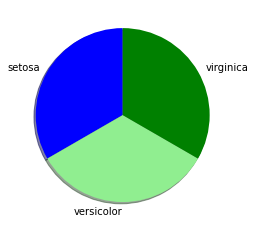

In [ ]:
# (b) Gráfico 1 - Pizza | Salvar jpg
import matplotlib.pyplot as plt
%matplotlib inline

porcent_species = [(qtdes/df['species'].count())*100]
labels = ['setosa', 'versicolor', 'virginica']
cores = ['blue', 'lightgreen', 'green']    # Cores usadas no plot

plt.pie(porcent_species, labels = labels, colors = cores, startangle = 90, shadow = True, explode = (0, 0, 0)) 
plt.savefig('pie_chart.jpg', dpi=100, size=(100, 100))
plt.show()

*O dataframe está igualmente dividido. Existe a mesma quantidade/porcentagem de exemplares por espécie.*

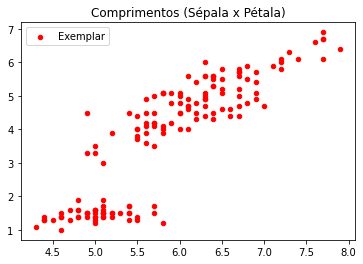

<Figure size 432x288 with 0 Axes>

In [ ]:
# (b) Gráfico 2 - Dispersão | Salvar jpg

x = df['sepal_length']
y = df['petal_length']

plt.scatter(x, y, label = 'Exemplar', color = 'r', marker = 'o', s = 20) 
plt.title('Comprimentos (Sépala x Pétala)')
plt.legend()
plt.show()

plt.savefig('scatter_chart.jpg', dpi=100, size=(100, 100))

**Existe uma tendência de proporcionalidade, de que quanto maior o comprimento da sépala, maior também o comprimento da pétala. **

In [ ]:
# (c) Convertendo as classes da coluna 'species'
df1 = df
df1['species'] = df1['species'].map({'setosa': 1, 'versicolor':2 , 'virginica': 3})
print(df1)

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        1
1             4.9          3.0           1.4          0.2        1
2             4.7          3.2           1.3          0.2        1
3             4.6          3.1           1.5          0.2        1
4             5.0          3.6           1.4          0.2        1
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        3
146           6.3          2.5           5.0          1.9        3
147           6.5          3.0           5.2          2.0        3
148           6.2          3.4           5.4          2.3        3
149           5.9          3.0           5.1          1.8        3

[150 rows x 5 columns]


In [ ]:
# (d) Separando dados de entrada e saída

# Separando os dados em X (características) e Y (classes)
import sklearn as sk

atributos = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
classes = ['species']

# Criar X e Y
X = df1[atributos].values
Y = df1[classes].values

### **3. Realizando predição com modelos de Aprendizagem de Máquina:**

In [ ]:
# Separando o conjunto de dados em Treino e Teste.
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size=0.25, shuffle=True, random_state=2021)

In [ ]:
# Classificador Bayesiano Gaussiano

from sklearn.naive_bayes import GaussianNB

modelo1 = GaussianNB()
# Treinamento do modelo
modelo1.fit(X_treino, y_treino.ravel())

# Predição
from sklearn import metrics
y_predict = modelo1.predict(X_treino)

acc_treino1 = metrics.accuracy_score(y_treino, y_predict)
acc_treino1

# Vamos avaliar pelos dados de teste:
y_pred_test = modelo1.predict(X_teste)
# print(y_teste) # Classes reais do conjunto de teste
# print(y_pred_test) # Classes da predição do modelo para o conj. de teste

acc_teste1 = metrics.accuracy_score(y_teste, y_pred_test)
acc_teste1
print("Acurácia do Bayesiano Gaussiano foi: %.4f" %(acc_teste1*100))

Acurácia do Bayesiano Gaussiano foi: 94.7368


In [ ]:
# Classificador Árvore de Decisão

from sklearn.ensemble import RandomForestClassifier

modelo2 = RandomForestClassifier(n_estimators=200,)

modelo2.fit(X_treino, y_treino.ravel())

y_pred2 = modelo2.predict(X_treino)
acc_treino2 = metrics.accuracy_score(y_treino, y_pred2)
print(acc_treino2)

y_predteste2 = modelo2.predict(X_teste)
acc_teste2 = metrics.accuracy_score(y_teste, y_predteste2)
print("Acurácia do Random Forest foi: %.4f" %(acc_teste2*100))

1.0
Acurácia do Random Forest foi: 94.7368


In [ ]:
from sklearn.tree import DecisionTreeClassifier
for max in range(1,10):
  print("max:", max)
  modelo3 = DecisionTreeClassifier(max_depth=max, random_state=42)

  modelo3.fit(X_treino, y_treino)

  y_predtreino3 = modelo3.predict(X_treino)
  acc_treino3 = metrics.accuracy_score(y_treino, y_predtreino3)
  print(acc_treino3)

  y_predteste3 = modelo3.predict(X_teste)
  acc_teste3 = metrics.accuracy_score(y_teste, y_predteste3)

  print("Acurácia do Classificador Árvore de Decisão foi: %.4f" %(acc_teste3*100))
  print()

max: 1
0.6785714285714286
Acurácia do Classificador Árvore de Decisão foi: 63.1579

max: 2
0.9642857142857143
Acurácia do Classificador Árvore de Decisão foi: 94.7368

max: 3
0.9732142857142857
Acurácia do Classificador Árvore de Decisão foi: 94.7368

max: 4
0.9821428571428571
Acurácia do Classificador Árvore de Decisão foi: 94.7368

max: 5
0.9910714285714286
Acurácia do Classificador Árvore de Decisão foi: 94.7368

max: 6
1.0
Acurácia do Classificador Árvore de Decisão foi: 94.7368

max: 7
1.0
Acurácia do Classificador Árvore de Decisão foi: 94.7368

max: 8
1.0
Acurácia do Classificador Árvore de Decisão foi: 94.7368

max: 9
1.0
Acurácia do Classificador Árvore de Decisão foi: 94.7368



In [ ]:
# Classificador Regressão 

import numpy as np
from sklearn.linear_model import LinearRegression 

modelo_v2 = LinearRegression()
modelo_v2.fit(X_treino, y_treino.ravel())
# Verificando os dados de treino
lr_predict_train = modelo_v2.predict(X_treino)
print("Treino:")
print('MAE:', metrics.mean_absolute_error(y_treino, lr_predict_train))
print('MSE:', metrics.mean_squared_error(y_treino, lr_predict_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_treino, lr_predict_train)))
print()

# Verificando nos dados de teste
lr_predict_test = modelo_v2.predict(X_teste)
print("Teste:")
print('MAE:', metrics.mean_absolute_error(y_teste, lr_predict_test))
print('MSE:', metrics.mean_squared_error(y_teste, lr_predict_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, lr_predict_test)))
print()

Treino:
MAE: 0.16792334063063816
MSE: 0.04720380419003452
RMSE: 0.21726436474957075

Teste:
MAE: 0.15759086045741516
MSE: 0.0450883445144456
RMSE: 0.21234016227375735



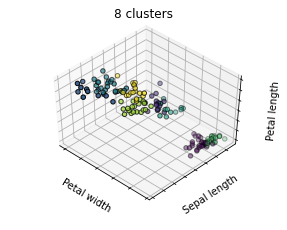

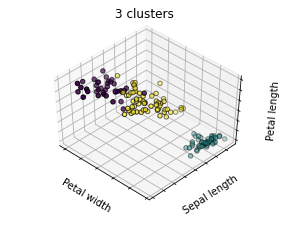

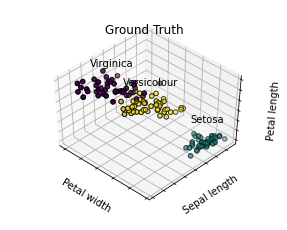

In [ ]:
# K-means

import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(8)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fignum = 1
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
    ax.set_position([0, 0, 0.95, 1])
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
# fig = plt.figure(fignum, figsize=(4, 3))
# ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
# ax.set_position([0, 0, 0.95, 1])

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )
# Reordenando rótulos para combinar cores e os resultados dos clusters
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")
ax.dist = 12

fig.show()

In [ ]:
# Criando o modelo preditivo com uma Multi-layer Perceptron

# Classificador Multi-layer Perceptron
from sklearn.neural_network import MLPClassifier  # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

# Criando o modelo preditivo
modelo = MLPClassifier(hidden_layer_sizes = (10), max_iter=1000, random_state=42)

# Treinando o modelo
modelo.fit(X_treino, y_treino.ravel())

# Previsão para o conjunto de treino
pred_train = modelo.predict(X_treino)
acc_train = metrics.accuracy_score(y_treino, pred_train)
print("Accuracy Treino: %.6f" %acc_train)

# Previsão para o conjunto de Teste
pred_test = modelo.predict(X_teste)
acc_test = metrics.accuracy_score(y_teste, pred_test)
print("Accuracy Teste: %.6f" %(acc_test))

Accuracy Treino: 0.982143
Accuracy Teste: 0.947368


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[[16  0  0]
 [ 0 14  0]
 [ 0  2  6]]


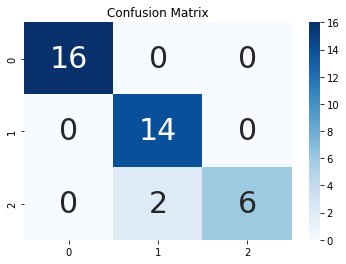

In [ ]:
# Matriz de confusão

from sklearn.metrics import confusion_matrix
y_pred_test = modelo1.predict(X_teste)
cm = confusion_matrix(y_teste, y_pred_test)
print(cm)

# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()